# Pre-Processing

This is the fourth notebook in series that uses GHCN Climate and UCDP Conflict data to predict the *total_deaths* count of conflict incidents based on their related 



### Goal of this Notebook

In this notebook we will:
- creaty dummy variables for our categorical feature *adm_1*
- standardize the magnitude of our numeric features
- split the data into a training and a test set


### Outline

This notebook is structured as follows:

**1. Importing the Necessary Libraries** 


**2. Loading the Dataset**


**3. Inspecting Missing Values**


**4. Creating Train and Test Splits**


**5. Scaling the Data**


**6. Summary and Conclusions**

# 1. Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import contextily as ctx
import warnings
import datetime
import re

# 2. Loading the Dataset

In [2]:
# import dataframe
df = pd.read_csv('/Users/richard/Desktop/data/processed/df_india_final_for_model.csv', 
                 index_col=0)

In [3]:
# check datatypes
df.dtypes

death_rate                   float64
PRCP_zone_1973_77            float64
PRCP_zone_1983_87            float64
PRCP_zone_1993_97            float64
PRCP_zone_2003_07            float64
PRCP_zone_2015_19            float64
TAVG_zone_1973_77            float64
TAVG_zone_1983_87            float64
TAVG_zone_1993_97            float64
TAVG_zone_2003_07            float64
TAVG_zone_2015_19            float64
TMAX_zone_1973_77            float64
TMAX_zone_1983_87            float64
TMAX_zone_1993_97            float64
TMAX_zone_2003_07            float64
TMAX_zone_2015_19            float64
TMIN_zone_1973_77            float64
TMIN_zone_1983_87            float64
TMIN_zone_1993_97            float64
TMIN_zone_2003_07            float64
TMIN_zone_2015_19            float64
PRCP_zone_sameyear           float64
TAVG_zone_sameyear           float64
TMAX_zone_sameyear           float64
TMIN_zone_sameyear           float64
PRCP_change_1973_2019        float64
TAVG_change_1973_2019        float64
T

Our datatypes are correct, as expected.

All features are numerical (floats) with no categorical columns, so no need to create dummy variables.

# 3. Inspecting Missing Values

In this section, we verify whether there are any rows with missing values in our dataframe. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14634 entries, 59218 to 95595
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   death_rate                 14634 non-null  float64
 1   PRCP_zone_1973_77          14634 non-null  float64
 2   PRCP_zone_1983_87          12974 non-null  float64
 3   PRCP_zone_1993_97          12948 non-null  float64
 4   PRCP_zone_2003_07          12948 non-null  float64
 5   PRCP_zone_2015_19          12962 non-null  float64
 6   TAVG_zone_1973_77          14634 non-null  float64
 7   TAVG_zone_1983_87          12974 non-null  float64
 8   TAVG_zone_1993_97          12948 non-null  float64
 9   TAVG_zone_2003_07          12948 non-null  float64
 10  TAVG_zone_2015_19          12962 non-null  float64
 11  TMAX_zone_1973_77          14634 non-null  float64
 12  TMAX_zone_1983_87          12974 non-null  float64
 13  TMAX_zone_1993_97          12948 non-null 

There are about 1500 rows with missing values for some of the climate means. From our work in the previous notebook *03-rrp-exploratory-data-analysis* we know that it is very likely that the same stations were lacking climate measurements for all years, i.e. we expect the rows with missing values to be consistent. 

Our target feature *death_rate* has no missing values.

We will leave these missing values as they are for now and impute them as part of our Pipeline in the next notebook *05-rrp-modelling*.

Our final dataframe has 14634 rows and 33 features.

In [8]:
df.shape

(14634, 33)

# 4. Creating Training and Testing Sets

In this section, we split our data into training and testing sets. We will use a training size of 70%.

In [11]:
# define feature vector and response variable
X = df.drop('death_rate', axis=1)
y = df.death_rate

In [12]:
len(X.columns)

32

In [13]:
y.value_counts()

1.000000     6271
2.000000     2769
3.000000     1323
0.000000      915
4.000000      759
             ... 
0.111111        1
87.000000       1
74.000000       1
47.000000       1
4.322581        1
Name: death_rate, Length: 185, dtype: int64

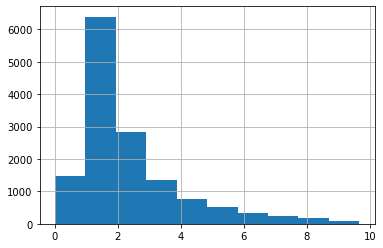

In [19]:
y[y < 10].hist();

The target feature is skewed, but shows no predominance of 0 values.

In [20]:
# create training and testing splits
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size=0.7,
                                                    random_state=42)

# 5. Scaling the Data

In this section, we proceed to standardize these numerical features using a Scikit-Learn Scaler.

**IMPORTANT:** We fit the scaler to our training set and use that fitted scaler to transform our test set. This is an important step to avoid data leakage.

In [21]:
# instantiate the scaler
scaler = StandardScaler()

In [22]:
# fit scaler to training set
scaler.fit(X_train)

StandardScaler()

In [23]:
# use fitted scaler to transform training and test sets
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

# 6. Exporting Sets to CSV
Below, we export the training and test splits (scaled and unscaled) to local CSV files for use in the next notebook.

To do so, we first have to convert the numpy arrays into dataframes.

In [24]:
# convert numpy arrays to dataframes
df_X_train = pd.DataFrame(X_train)
df_X_test = pd.DataFrame(X_test)
df_y_train = pd.DataFrame(y_train)
df_y_test = pd.DataFrame(y_test)

df_X_train_sc = pd.DataFrame(X_train_sc)
df_X_test_sc = pd.DataFrame(X_test_sc)

In [25]:
# export dataframes to csv
df_X_train.to_csv('/Users/richard/Desktop/data/processed/X_train_unscaled.csv')
df_X_test.to_csv('/Users/richard/Desktop/data/processed/X_test_unscaled.csv')
df_y_train.to_csv('/Users/richard/Desktop/data/processed/y_train_unscaled.csv')
df_y_test.to_csv('/Users/richard/Desktop/data/processed/y_test_unscaled.csv')

df_X_train_sc.to_csv('/Users/richard/Desktop/data/processed/X_train_scaled.csv')
df_X_test_sc.to_csv('/Users/richard/Desktop/data/processed/X_test_scaled.csv')

# 7. Summary

In this notebook, we have:
- inspected the missing values in our final dataframe
- split our data into a training and a test set
- scaled the data using a scaler fitted to our training set
- exported our splits to local csv files for later use

We now are proceeding the analysis with a dataframe containing:
- 12911 observations, and
- 33 features (1 target, 32 predictor)